In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'data/pred_merged/'

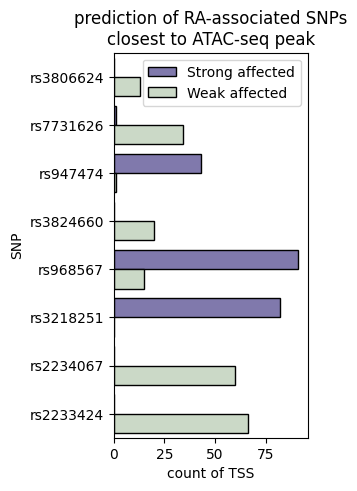

In [3]:
# small model
data = pd.read_csv('data/pred_merged/merged_all.csv')

ax = plt.subplots(figsize=(2.5,5))

morandi_palette = ["#7A70B5","#C9DCC4"]
ax = sns.barplot(y = 'SNP', x = 'count of TSS', data = data, hue = 'type', ci=50, palette=morandi_palette, alpha=1)
#plt.xlim(0, 50)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

#plt.xlim(0, 36)
plt.legend(loc="best")
plt.title('prediction of RA-associated SNPs\nclosest to ATAC-seq peak')
plt.savefig('images/distribution.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [4]:
# Let's modify the code based on the updated requirements:
# We will use the TSS_POS (transcription start site position) as the x-axis and map the t0 and t24 values onto this.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'data/case/rs1893592_large_pro_5top.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,TSS_POS,gene,variant_id,slope,Ref,Alt,CHR,SNP_POS,label,tss_distance,t0,t24
0,42403902,UBASH3A,rs1893592,0,A,G,chr21,42434957,0,31055,-0.0927,-0.0633
1,42396052,TMPRSS3,rs1893592,0,A,G,chr21,42434957,0,38905,-0.5763,-0.3581
2,42389149,TMPRSS3,rs1893592,0,A,G,chr21,42434957,0,45808,-0.1452,-0.3203
3,42366535,TFF1,rs1893592,0,A,G,chr21,42434957,0,68422,0.0279,0.1210
4,42496224,RSPH1,rs1893592,0,A,G,chr21,42434957,0,-61267,0.0394,-0.2218


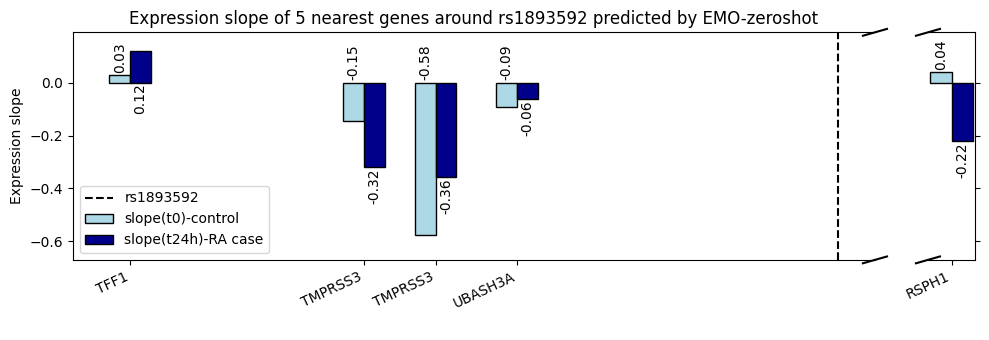

In [5]:
import matplotlib.pyplot as plt
import numpy as np

tss_positions = df['TSS_POS']
t0_values = df['t0']
t24_values = df['t24']
genes = df['gene']
snp_pos = df['SNP_POS'].iloc[0]
slope_values1 = df['t0']
slope_values2 = df['t24']

# Modify the plot to have the second segment start from 5000bp after the SNP

# Define the new break position as 3000bp after SNP
start_after_snp = snp_pos + 3000

# Create a figure and two subplots, with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3.5),gridspec_kw={'width_ratios': [17, 1]})

# Define mask to split data around SNP and 5000bp after SNP
mask1 = tss_positions <= snp_pos  # Data before or at SNP
mask2 = tss_positions >= start_after_snp  # Data starting 5000bp after SNP

bar_width = 2000  # Width of bars

# Plot t0 and t24 as bar plots for the first part (before SNP)
bars1_t0 = ax1.bar(tss_positions[mask1] - bar_width/2, t0_values[mask1], bar_width, label='slope(t0)-control', color='#ADD8E6', edgecolor='black')
bars1_t24 = ax1.bar(tss_positions[mask1] + bar_width/2, t24_values[mask1], bar_width, label='slope(t24h)-RA case', color='#00008B', edgecolor='black')

# Plot t0 and t24 as bar plots for the second part (starting 5000bp after SNP)
bars2_t0 = ax2.bar(tss_positions[mask2] - (bar_width-500)/2, t0_values[mask2], bar_width-500, label='slope(t0)-control', color='#ADD8E6', edgecolor='black')
bars2_t24 = ax2.bar(tss_positions[mask2] + (bar_width-500)/2, t24_values[mask2], bar_width-500, label='slope(t24h)-RA case', color='#00008B', edgecolor='black')

# Mark the SNP position with a vertical dashed line in both axes
ax1.axvline(x=snp_pos, color='black', linestyle='--', label=f'rs1893592')
#ax2.axvline(x=snp_pos, color='black', linestyle='--')

# Hide the spines between ax1 and ax2 for the break
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# Add diagonal lines to denote the axis break
d = .015  # size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)  # bottom diagonal
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # top diagonal

kwargs.update(transform=ax2.transAxes)
ax2.plot((-17*d, +17*d), (-d, +d), **kwargs)  # bottom diagonal
ax2.plot((-17*d, +17*d), (1-d, 1+d), **kwargs)  # top diagonal

# Annotate bars in the first subplot
for bar, slope in zip(bars1_t0, slope_values1[mask1]):
    if(slope > 0):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f'{slope:.2f}', ha='center', va='bottom', rotation=90)
    else:
        ax1.text(bar.get_x() + bar.get_width()/2, 0.01, f'{slope:.2f}', ha='center', va='bottom', rotation=90)

for bar, slope in zip(bars1_t24, slope_values2[mask1]):
    if(slope > 0):
        ax1.text(bar.get_x() + bar.get_width()/2, -0.12, f'{slope:.2f}', ha='center', va='bottom', rotation=90)
    else:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.14, f'{slope:.2f}', ha='center', va='bottom', rotation=90)

# Annotate bars in the second subplot
for bar, slope in zip(bars2_t0, slope_values1[mask2]):
    if(slope > 0):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f'{slope:.2f}', ha='center', va='bottom', rotation=90)
    else:
        ax2.text(bar.get_x() + bar.get_width()/2, 0.01, f'{slope:.2f}', ha='center', va='bottom', rotation=90)

for bar, slope in zip(bars2_t24, slope_values2[mask2]):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.14, f'{slope:.2f}', ha='center', va='bottom', rotation=90)

# Set x-axis labels with gene names
ax1.set_xticks(tss_positions[mask1])
ax1.set_xticklabels(genes[mask1], rotation=25, ha="right")
ax2.set_xticks(tss_positions[mask2])
ax2.set_xticklabels(genes[mask2], rotation=25, ha="right")

# Add titles and labels
ax1.set_xlabel(' ')
#ax2.set_xlabel('TSS Position')
ax1.set_ylabel('Expression slope')
ax1.set_title('Expression slope of 5 nearest genes around rs1893592 predicted by EMO-zeroshot')

# Add legend
ax1.legend()

plt.ylim((-0.67, 0.19))

# Display the plot
plt.tight_layout()
plt.savefig('images/barplot.png',dpi=300, bbox_inches = 'tight')
plt.show()

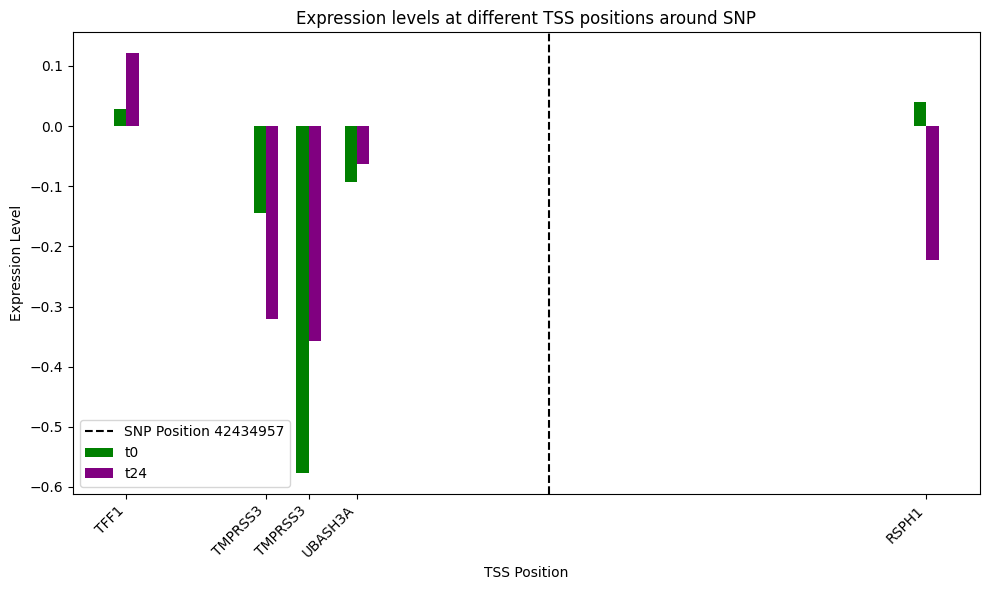

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Extract necessary columns from the dataframe
tss_positions = df['TSS_POS']
t0_values = df['t0']
t24_values = df['t24']
genes = df['gene']
snp_pos = df['SNP_POS'].iloc[0]


# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the DNA sequence and mark the SNP position with a vertical dashed line
bar_width = 2000  # Width of bars

# Plot t0 and t24 as bar plots
ax.bar(tss_positions - bar_width/2, t0_values, bar_width, label='t0', color='green')
ax.bar(tss_positions + bar_width/2, t24_values, bar_width, label='t24', color='purple')

# Mark the SNP position with a vertical dashed line
snp_pos = df['SNP_POS'].iloc[0]
plt.axvline(x=snp_pos, color='black', linestyle='--', label=f'SNP Position {snp_pos}')

# Label the x-axis with TSS positions
plt.xticks(tss_positions, genes, rotation=45, ha="right")

# Add titles and labels
ax.set_xlabel('TSS Position')
ax.set_ylabel('Expression Level')
ax.set_title('Expression levels at different TSS positions around SNP')

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()